1. Domain
==========
Botany, seeds, WheetAgriculture (Wheat)


2. Problem Statement
=====================
    A. Inputs
        -descriptions of wheat seeds with 7D measurement
         1. area A ---> 'area'
         2. perimeter P ---> 'perimeter' 
         3. compactness C = 4*pi*A/P^2 ---> 'compactness'
         4. length of kernel ---> 'kernel_length'
         5. width of kernel ---> 'kernel_width'
         6. asymmetry coefficient ---> 'asymmetry_coeff'
         7. length of kernel groove ---> 'kernel_groove_length'
         Features: area perimeter compactness kernel_length kernel_width asymmetry_coeff kernel_groove_length target
    B. Learning
        -We will train a classification and clustering model
    C. Outputs
        -to output and relate the species/label
        


3. Metric
==========
-We will use BIC as an accuracy test 


4. Data Summary
================
-n:210, p:7
-3 different varieties (Kama,Rosa, and Canadian of wheat with 70 each -210 instances in total


5. Solution Proposal
====================
-GLM/Logistic Regression for Classification (Supervised Learning)
-kMeans for Clustering (Unsupervised Learning)



6. Benchmark Model
==================
Using Train-Test Splitting
-Guess all 'Kama' --> should have a 33.33% accruacy
-Guess 1(2?) or 210 Clusters


7. Plan 
========
-Load the data
-Visualize the data
-Feature selection
-Train-Test Split
-Assess the model




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
features_name = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target']

pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

wheat_seeds_df = pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

In [3]:
wheat_seeds_df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
wheat_seeds_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Figure size 720x720 with 0 Axes>

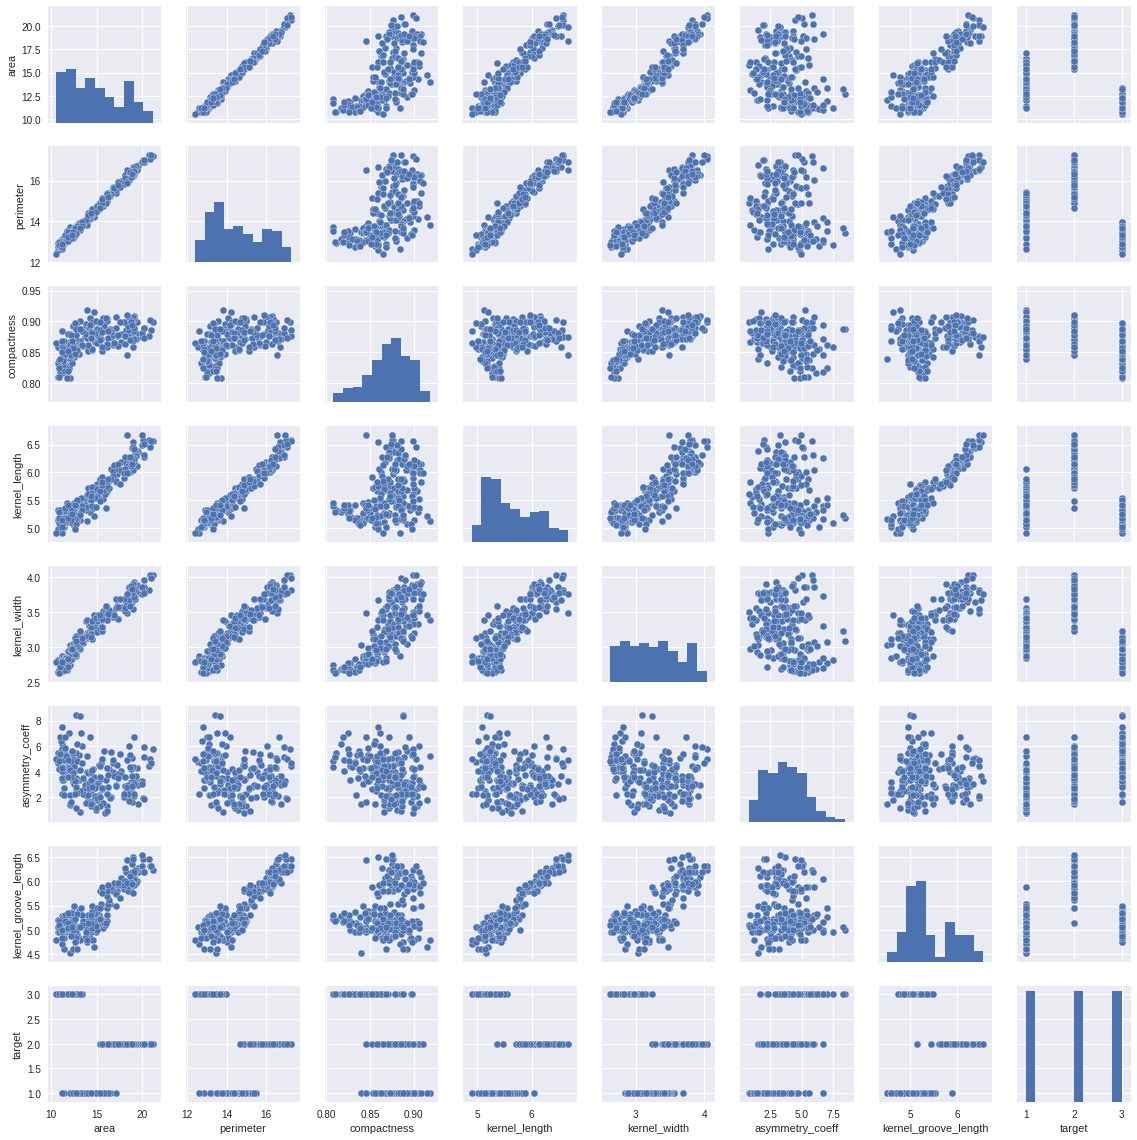

In [5]:
plt.figure(1, (10,10))

sns.pairplot(wheat_seeds_df, size=2, aspect=1)

In [6]:
wheat_seeds_df_plot_1 = wheat_seeds_df.drop('target', axis=1)
wheat_seeds_df_plot_1 = wheat_seeds_df_plot_1.drop('compactness', axis=1)
wheat_seeds_df_plot_1 = wheat_seeds_df_plot_1.drop('kernel_length', axis=1)
wheat_seeds_df_plot_1 = wheat_seeds_df_plot_1.drop('kernel_width', axis=1)
wheat_seeds_df_plot_1 = wheat_seeds_df_plot_1.drop('asymmetry_coeff', axis=1)
wheat_seeds_df_plot_1 = wheat_seeds_df_plot_1.drop('kernel_groove_length', axis=1)


wheat_seeds_df_plot_2 = wheat_seeds_df.drop('target', axis=1)
wheat_seeds_df_plot_2 = wheat_seeds_df_plot_2.drop('area', axis=1)
wheat_seeds_df_plot_2 = wheat_seeds_df_plot_2.drop('perimeter', axis=1)

wheat_seeds_df_plot_3 = wheat_seeds_df.drop('target', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('area', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('perimeter', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('kernel_length', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('kernel_width', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('asymmetry_coeff', axis=1)
wheat_seeds_df_plot_3 = wheat_seeds_df_plot_3.drop('kernel_groove_length', axis=1)

samp_1 = wheat_seeds_df_plot_1.sample(42)
samp_2 = wheat_seeds_df_plot_2.sample(42)
samp_3 = wheat_seeds_df_plot_3.sample(42)

samp_1 = pd.melt(samp_1.select_dtypes([float]))
samp_2 = pd.melt(samp_2.select_dtypes([float]))
samp_3 = pd.melt(samp_3.select_dtypes([float]))

wheat_seeds_melt = pd.melt(wheat_seeds_df.select_dtypes([float])) 
wheat_seeds_melt_1 = pd.melt(wheat_seeds_df_plot_1.select_dtypes([float]))
wheat_seeds_melt_2 = pd.melt(wheat_seeds_df_plot_2.select_dtypes([float]))
wheat_seeds_melt_3 = pd.melt(wheat_seeds_df_plot_3.select_dtypes([float]))

(0.8, 1)

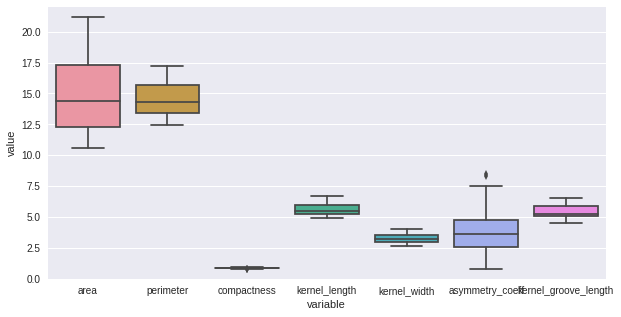

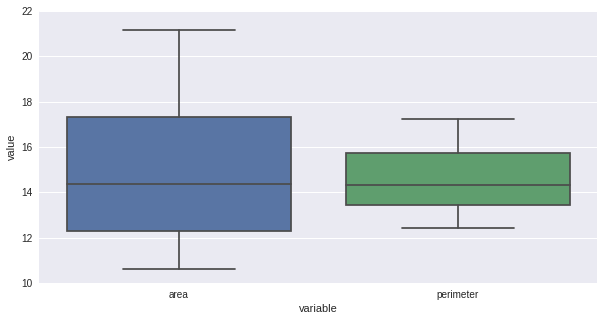

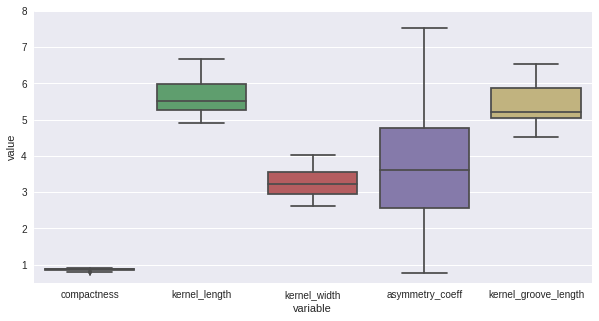

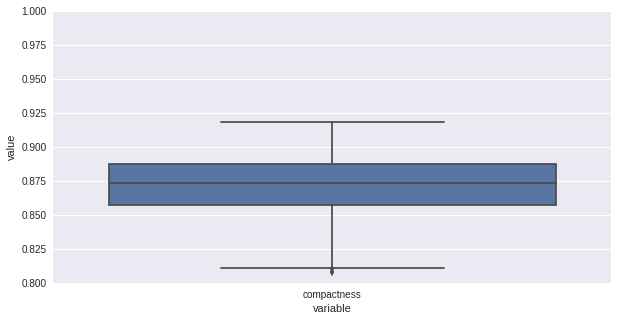

In [7]:
from IPython.display import display

fig = plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=wheat_seeds_melt)
plt.ylim(0,22)

fig = plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=wheat_seeds_melt_1)
plt.ylim(10,22)


fig = plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=wheat_seeds_melt_2)
plt.ylim(0.5,8)

fig = plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=wheat_seeds_melt_3)
plt.ylim(0.8,1)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


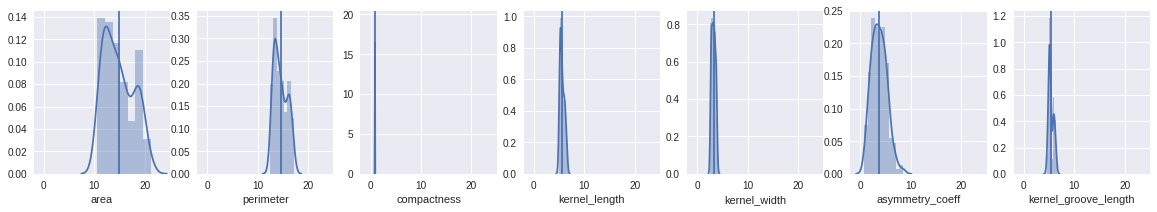

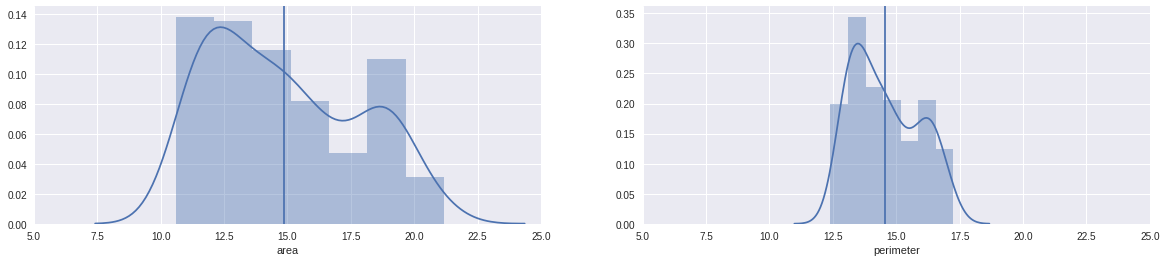

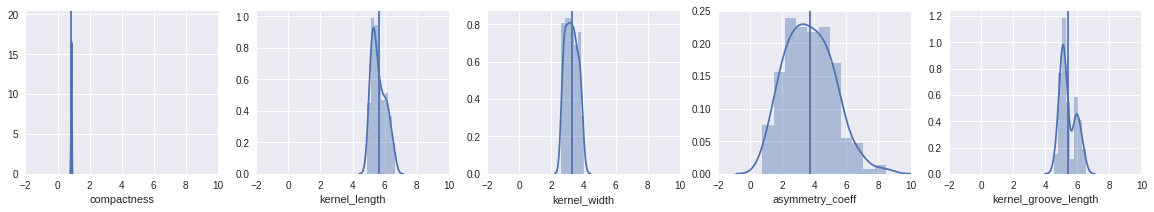

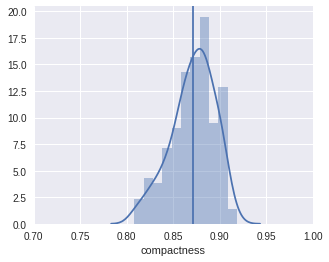

In [8]:
#1 All Features
_, ax = plt.subplots(1,7, figsize=(20,3))
wheat_seeds_melt_numerical_df = wheat_seeds_df.select_dtypes([float])

for i, feat in enumerate(wheat_seeds_melt_numerical_df.columns):
    sns.distplot(wheat_seeds_melt_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(-2,25)
    ax[i].axvline(wheat_seeds_melt_numerical_df[feat].mean())


#2 Area & Perimeters  
_, ax = plt.subplots(1,2, figsize=(20,4))
wheat_seeds_melt_1_numerical_df = wheat_seeds_df_plot_1.select_dtypes([float])

for i, feat in enumerate(wheat_seeds_melt_1_numerical_df.columns):
    sns.distplot(wheat_seeds_melt_1_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(5,25)
    ax[i].axvline(wheat_seeds_melt_1_numerical_df[feat].mean())


#3 Other 
_, ax = plt.subplots(1,5, figsize=(20,3))
wheat_seeds_melt_2_numerical_df = wheat_seeds_df_plot_2.select_dtypes([float])

for i, feat in enumerate(wheat_seeds_melt_2_numerical_df.columns):
    sns.distplot(wheat_seeds_melt_2_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(-2,10)
    ax[i].axvline(wheat_seeds_melt_2_numerical_df[feat].mean())

#4 Compactness
_, ax = plt.subplots(1,1, figsize=(5,4))
wheat_seeds_melt_3_numerical_df = wheat_seeds_df_plot_3.select_dtypes([float])

sns.distplot(wheat_seeds_melt_3_numerical_df['compactness'])
ax.set_xlim(0.7,1)
ax.axvline(wheat_seeds_melt_3_numerical_df['compactness'].mean())

In [9]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

In [10]:
def BIC(log_reg_model, features, target):
    log_reg_model.fit(features, target)
    predictions = log_reg_model.predict_proba(features)
    n = features.shape[0]
    p = features.shape[1]
    complexity = np.log(n)*(p+1)
    likelyhood = -2*log_loss(target, predictions)
    return complexity - likelyhood

In [11]:
wheat_seeds_log_reg = LogisticRegression()

target = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_length', \
                                'kernel_width', 'asymmetry_coeff', 'kernel_groove_length'])
target = target.T

In [12]:
feat_7_0 = wheat_seeds_df.T.drop(['target'])
feat_7_0 = feat_7_0.T

print("model_0_0: %f" %BIC(wheat_seeds_log_reg, feat_7_0, target))

model_0_0: 43.271407


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
feat_bs_6_0 = wheat_seeds_df.T.drop(['kernel_groove_length', 'target'])
feat_bs_6_0 = feat_bs_6_0.T

feat_bs_6_1 = wheat_seeds_df.T.drop(['asymmetry_coeff','target'])
feat_bs_6_1 = feat_bs_6_1.T

feat_bs_6_2 = wheat_seeds_df.T.drop(['kernel_width', 'target'])
feat_bs_6_2 = feat_bs_6_2.T

feat_bs_6_3 = wheat_seeds_df.T.drop(['kernel_length', 'target'])
feat_bs_6_3 = feat_bs_6_3.T

feat_bs_6_4 = wheat_seeds_df.T.drop(['compactness', 'target'])
feat_bs_6_4 = feat_bs_6_4.T

feat_bs_6_5 = wheat_seeds_df.T.drop(['perimeter', 'target'])
feat_bs_6_5 = feat_bs_6_5.T

feat_bs_6_6 = wheat_seeds_df.T.drop(['area', 'target'])
feat_bs_6_6 = feat_bs_6_6.T

print("model_bs_1_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_0, target))
print("model_bs_1_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_1, target))
print("model_bs_1_2: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_2, target))
print("model_bs_1_3: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_3, target))
print("model_bs_1_4: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_4, target))
print("model_bs_1_5: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_5, target))
print("model_bs_1_6: %f" %BIC(wheat_seeds_log_reg, feat_bs_6_6, target))
print()
print("model_bs_1_4 has the lowest BIC value")
print("model_bs_1_6 has the highest BIC value so will remove the feature 'area' and recalculate BIC")
print()

model_bs_1_0: 38.100161
model_bs_1_1: 38.034295
model_bs_1_2: 37.932785
model_bs_1_3: 37.933236
model_bs_1_4: 37.925692
model_bs_1_5: 37.996738
model_bs_1_6: 38.394061

model_bs_1_4 has the lowest BIC value
model_bs_1_6 has the highest BIC value so will remove the feature 'area' and recalculate BIC



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
feat_bs_5_0 = wheat_seeds_df.T.drop(['area','kernel_groove_length', 'target'])
feat_bs_5_0 = feat_bs_5_0.T

feat_bs_5_1 = wheat_seeds_df.T.drop(['area', 'asymmetry_coeff', 'target'])
feat_bs_5_1 = feat_bs_5_1.T

feat_bs_5_2 = wheat_seeds_df.T.drop(['area', 'kernel_width', 'target'])
feat_bs_5_2 = feat_bs_5_2.T

feat_bs_5_3 = wheat_seeds_df.T.drop(['area', 'kernel_length', 'target'])
feat_bs_5_3 = feat_bs_5_3.T

feat_bs_5_4 = wheat_seeds_df.T.drop(['area', 'compactness', 'target'])
feat_bs_5_4 = feat_bs_5_4.T

feat_bs_5_5 = wheat_seeds_df.T.drop(['area', 'perimeter', 'target'])
feat_bs_5_5 = feat_bs_5_5.T



print("model_bs_2_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_0, target))
print("model_bs_2_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_1, target))
print("model_bs_2_2: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_2, target))
print("model_bs_2_3: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_3, target))
print("model_bs_2_4: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_4, target))
print("model_bs_2_5: %f" %BIC(wheat_seeds_log_reg, feat_bs_5_5, target))
print()
print("model_bs_2_2 has the lowest BIC value")
print("model_bs_2_0 has the highest BIC value so will remove the feature 'kernel_groove_length' and recalculate BIC")
print()

model_bs_2_0: 33.325098
model_bs_2_1: 33.194962
model_bs_2_2: 33.075562
model_bs_2_3: 33.107367
model_bs_2_4: 33.109353
model_bs_2_5: 33.088427

model_bs_2_2 has the lowest BIC value
model_bs_2_0 has the highest BIC value so will remove the feature 'kernel_groove_length' and recalculate BIC



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
feat_bs_4_0 = wheat_seeds_df.T.drop(['area', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_4_0 = feat_bs_4_0.T
feat_bs_4_1 = wheat_seeds_df.T.drop(['area', 'kernel_width', 'kernel_groove_length', 'target'])
feat_bs_4_1 = feat_bs_4_1.T
feat_bs_4_2 = wheat_seeds_df.T.drop(['area', 'kernel_length', 'kernel_groove_length', 'target'])
feat_bs_4_2 = feat_bs_4_2.T
feat_bs_4_3 = wheat_seeds_df.T.drop(['area', 'compactness', 'kernel_groove_length', 'target'])
feat_bs_4_3 = feat_bs_4_3.T
feat_bs_4_4 = wheat_seeds_df.T.drop(['area','perimeter', 'kernel_groove_length', 'target'])
feat_bs_4_4 = feat_bs_4_4.T

print("model_bs_3_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_4_0, target))
print("model_bs_3_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_4_1, target))
print("model_bs_3_2: %f" %BIC(wheat_seeds_log_reg, feat_bs_4_2, target))
print("model_bs_3_3: %f" %BIC(wheat_seeds_log_reg, feat_bs_4_3, target))
print("model_bs_3_4: %f" %BIC(wheat_seeds_log_reg, feat_bs_4_4, target))
print()
print("model_bs_3_2 has the lowest BIC value")
print("model_bs_3_0 has the highest BIC value so will remove the feature 'asymmetry_coeff' and recalculate BIC")
print()

model_bs_3_0: 28.251396
model_bs_3_1: 28.018655
model_bs_3_2: 28.012958
model_bs_3_3: 28.059713
model_bs_3_4: 28.016554

model_bs_3_2 has the lowest BIC value
model_bs_3_0 has the highest BIC value so will remove the feature 'asymmetry_coeff' and recalculate BIC



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
feat_bs_3_0 = wheat_seeds_df.T.drop(['area', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_3_0 = feat_bs_3_0.T
feat_bs_3_1 = wheat_seeds_df.T.drop(['area', 'kernel_length',  'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_3_1 = feat_bs_3_1.T
feat_bs_3_2 = wheat_seeds_df.T.drop(['area', 'compactness', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_3_2 = feat_bs_3_2.T
feat_bs_3_3 = wheat_seeds_df.T.drop(['area', 'perimeter', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_3_3 = feat_bs_3_3.T

print("model_bs_4_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_3_0, target))
print("model_bs_4_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_3_1, target))
print("model_bs_4_2: %f" %BIC(wheat_seeds_log_reg, feat_bs_3_2, target))
print("model_bs_4_3: %f" %BIC(wheat_seeds_log_reg, feat_bs_3_3, target))
print()
print("model_bs_4_3 has the lowest BIC value")
print("model_bs_4_2 has the highest BIC value so will remove the feature 'compactness' and recalculate BIC")
print()

model_bs_4_0: 22.977068
model_bs_4_1: 22.956271
model_bs_4_2: 22.992862
model_bs_4_3: 22.946606

model_bs_4_3 has the lowest BIC value
model_bs_4_2 has the highest BIC value so will remove the feature 'compactness' and recalculate BIC



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_length', \
                               # 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
    
feat_bs_2_0 = wheat_seeds_df.T.drop(['area', 'compactness', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_2_0 = feat_bs_2_0.T
feat_bs_2_1 = wheat_seeds_df.T.drop(['area', 'compactness', 'kernel_length', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_2_1 = feat_bs_2_1.T
feat_bs_2_2 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_2_2 = feat_bs_2_2.T

print("model_bs_5_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_2_0, target))
print("model_bs_5_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_2_1, target))
print("model_bs_5_2: %f" %BIC(wheat_seeds_log_reg, feat_bs_2_2, target))
print()
print("model_bs_5_2 has the lowest BIC value")
print("model_bs_5_0 has the highest BIC value so will remove the feature 'kernel_width' and recalculate BIC")
print()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model_bs_5_0: 17.717157
model_bs_5_1: 17.706983
model_bs_5_2: 17.683988

model_bs_5_2 has the lowest BIC value
model_bs_5_0 has the highest BIC value so will remove the feature 'kernel_width' and recalculate BIC



In [18]:
feat_bs_1_0 = wheat_seeds_df.T.drop(['area', 'compactness', 'kernel_length','kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_1_0 = feat_bs_1_0.T
feat_bs_1_1 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_width','asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_bs_1_1 = feat_bs_1_1.T

print("model_bs_6_0: %f" %BIC(wheat_seeds_log_reg, feat_bs_1_0, target))
print("model_bs_6_1: %f" %BIC(wheat_seeds_log_reg, feat_bs_1_1, target))
print()
print("model_bs_6_0 has the lowest BIC value")
print("model_bs_6_1 has the highest BIC value")
print()

model_bs_6_0: 12.503907
model_bs_6_1: 12.601649

model_bs_6_0 has the lowest BIC value
model_bs_6_1 has the highest BIC value



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print('Top 3 from Backward Selection')
print("model_bs_6_0: 12.503907 ===> feat_bs_1_1")
print("model_bs_6_0: 12.503907 ===> feat_bs_1_0")
print("model_bs_5_2: 17.683988 ===> feat_bs_2_2")

Top 3 from Backward Selection
model_bs_6_0: 12.503907 ===> feat_bs_1_1
model_bs_6_0: 12.503907 ===> feat_bs_1_0
model_bs_5_2: 17.683988 ===> feat_bs_2_2


In [20]:
feat_fs_1_0 = wheat_seeds_df.T.drop(['perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_1_0 = feat_fs_1_0.T

feat_fs_1_1 = wheat_seeds_df.T.drop(['area', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_1_1 = feat_fs_1_1.T

feat_fs_1_2 = wheat_seeds_df.T.drop(['area', 'perimeter', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_1_2 = feat_fs_1_2.T

feat_fs_1_3 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_1_3 = feat_fs_1_3.T

feat_fs_1_4 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_length', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_1_4 = feat_fs_1_4.T

feat_fs_1_5 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'kernel_groove_length', 'target'])
feat_fs_1_5 = feat_fs_1_5.T

feat_fs_1_6 = wheat_seeds_df.T.drop(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'target'])
feat_fs_1_6 = feat_fs_1_6.T


print("model_fs_1_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_0, target))
print("model_fs_1_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_1, target))
print("model_fs_1_2: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_2, target))
print("model_fs_1_3: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_3, target))
print("model_fs_1_4: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_4, target))
print("model_fs_1_5: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_5, target))
print("model_fs_1_6: %f" %BIC(wheat_seeds_log_reg, feat_fs_1_6, target))
print()
print("model_fs_1_0 has the lowest BIC value so we will add a feature to 'area' and recalculate BIC.")
print("model_fs_1_2 has the highest")
print()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model_fs_1_0: 12.115507
model_fs_1_1: 12.503907
model_fs_1_2: 12.879199
model_fs_1_3: 12.601649
model_fs_1_4: 12.420367
model_fs_1_5: 12.530798
model_fs_1_6: 12.535999

model_fs_1_0 has the lowest BIC value so we will add a feature to 'area' and recalculate BIC.
model_fs_1_2 has the highest



In [21]:
feat_fs_2_0 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_2_0 = feat_fs_2_0.T

feat_fs_2_1 = wheat_seeds_df.T.drop(['perimeter', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_2_1 = feat_fs_2_1.T

feat_fs_2_2 = wheat_seeds_df.T.drop(['perimeter', 'compactness', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_2_2 = feat_fs_2_2.T

feat_fs_2_3 = wheat_seeds_df.T.drop(['perimeter', 'compactness', 'kernel_length', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_2_3 = feat_fs_2_3.T

feat_fs_2_4 = wheat_seeds_df.T.drop(['perimeter', 'compactness', 'kernel_length', 'kernel_width', 'kernel_groove_length', 'target'])
feat_fs_2_4 = feat_fs_2_4.T

feat_fs_2_5 = wheat_seeds_df.T.drop(['perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'target'])
feat_fs_2_5 = feat_fs_2_5.T

print("model_fs_2_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_0, target))
print("model_fs_2_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_1, target))
print("model_fs_2_2: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_2, target))
print("model_fs_2_3: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_3, target))
print("model_fs_2_4: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_4, target))
print("model_fs_2_5: %f" %BIC(wheat_seeds_log_reg, feat_fs_2_5, target))
print()
print("model_fs_2_0 has the lowest BIC value so we will add a feature to 'perimeter' and recalculate BIC.")
print("model_fs_2_1 has the highest")
print()

model_fs_2_0: 16.987778
model_fs_2_1: 17.355201
model_fs_2_2: 17.099948
model_fs_2_3: 17.255975
model_fs_2_4: 17.136845
model_fs_2_5: 17.063223

model_fs_2_0 has the lowest BIC value so we will add a feature to 'perimeter' and recalculate BIC.
model_fs_2_1 has the highest



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
feat_fs_3_0 = wheat_seeds_df.T.drop(['kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_3_0 = feat_fs_3_0.T
feat_fs_3_1 = wheat_seeds_df.T.drop(['compactness', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_3_1 = feat_fs_3_1.T
feat_fs_3_2 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'asymmetry_coeff', 'kernel_groove_length', 'target'])
feat_fs_3_2 = feat_fs_3_2.T
feat_fs_3_3 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'kernel_width', 'kernel_groove_length', 'target'])
feat_fs_3_3 = feat_fs_3_3.T
feat_fs_3_4 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'target'])
feat_fs_3_4 = feat_fs_3_4.T

print("model_fs_3_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_3_0, target))
print("model_fs_3_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_3_1, target))
print("model_fs_3_2: %f" %BIC(wheat_seeds_log_reg, feat_fs_3_2, target))
print("model_fs_3_3: %f" %BIC(wheat_seeds_log_reg, feat_fs_3_3, target))
print("model_fs_3_4: %f" %BIC(wheat_seeds_log_reg, feat_fs_3_4, target))
print()
print("model_fs_3_4 has the lowest BIC value so we will add a feature to 'kernel_groove_length' and recalculate BIC.")
print("model_fs_3_0 has the highest")
print()

model_fs_3_0: 22.327234
model_fs_3_1: 22.319483
model_fs_3_2: 22.285452
model_fs_3_3: 22.101598
model_fs_3_4: 22.011381

model_fs_3_4 has the lowest BIC value so we will add a feature to 'kernel_groove_length' and recalculate BIC.
model_fs_3_0 has the highest



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
feat_fs_4_0 = wheat_seeds_df.T.drop(['kernel_length', 'kernel_width', 'asymmetry_coeff', 'target'])
feat_fs_4_0 = feat_fs_4_0.T
feat_fs_4_1 = wheat_seeds_df.T.drop(['compactness', 'kernel_width', 'asymmetry_coeff', 'target'])
feat_fs_4_1 = feat_fs_4_1.T
feat_fs_4_2 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'asymmetry_coeff', 'target'])
feat_fs_4_2 = feat_fs_4_2.T
feat_fs_4_3 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'kernel_width', 'target'])
feat_fs_4_3 = feat_fs_4_3.T

print("model_fs_4_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_4_0, target))
print("model_fs_4_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_4_1, target))
print("model_fs_4_2: %f" %BIC(wheat_seeds_log_reg, feat_fs_4_2, target))
print("model_fs_4_3: %f" %BIC(wheat_seeds_log_reg, feat_fs_4_3, target))
print()
print("model_fs_4_3 has the lowest BIC value so we will add a feature to 'asymmetry_coeff' and recalculate BIC.")
print("model_fs_4_0 has the highest")
print()

model_fs_4_0: 27.356596
model_fs_4_1: 27.348118
model_fs_4_2: 27.352780
model_fs_4_3: 27.248686

model_fs_4_3 has the lowest BIC value so we will add a feature to 'asymmetry_coeff' and recalculate BIC.
model_fs_4_0 has the highest



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
feat_fs_5_0 = wheat_seeds_df.T.drop(['kernel_length', 'kernel_width', 'target'])
feat_fs_5_0 = feat_fs_5_0.T
feat_fs_5_1 = wheat_seeds_df.T.drop(['compactness', 'kernel_width', 'target'])
feat_fs_5_1 = feat_fs_5_1.T
feat_fs_5_2 = wheat_seeds_df.T.drop(['compactness', 'kernel_length', 'target'])
feat_fs_5_2 = feat_fs_5_2.T

print("model_fs_5_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_5_0, target))
print("model_fs_5_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_5_1, target))
print("model_fs_5_2: %f" %BIC(wheat_seeds_log_reg, feat_fs_5_2, target))
print()
print("model_fs_5_2 has the lowest BIC value so we will add a feature to 'kernel_width' and recalculate BIC.")
print("model_fs_5_0 has the highest")
print()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model_fs_5_0: 32.593732
model_fs_5_1: 32.587923
model_fs_5_2: 32.587576

model_fs_5_2 has the lowest BIC value so we will add a feature to 'kernel_width' and recalculate BIC.
model_fs_5_0 has the highest



In [25]:
feat_fs_6_0 = wheat_seeds_df.T.drop(['kernel_length', 'target'])
feat_fs_6_0 = feat_fs_6_0.T
feat_fs_6_1 = wheat_seeds_df.T.drop(['compactness', 'target'])
feat_fs_6_1 = feat_fs_6_1.T

print("model_fs_6_0: %f" %BIC(wheat_seeds_log_reg, feat_fs_6_0, target))
print("model_fs_6_1: %f" %BIC(wheat_seeds_log_reg, feat_fs_6_1, target))
print()
print("model_fs_6_1 has the lowest BIC value")
print("model_fs_6_0 has the highest")
print()

model_fs_6_0: 37.933236
model_fs_6_1: 37.925692

model_fs_6_1 has the lowest BIC value
model_fs_6_0 has the highest



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print('Top 3 from Foward Selection')
print('model_fs_1_0: 12.115507 ===> feat_fs_1_0')
print('model_fs_1_4: 12.420367 ===> feat_fs_1_4')
print('model_fs_1_1: 12.503907 ===> feat_fs_1_1')     

Top 3 from Foward Selection
model_fs_1_0: 12.115507 ===> feat_fs_1_0
model_fs_1_4: 12.420367 ===> feat_fs_1_4
model_fs_1_1: 12.503907 ===> feat_fs_1_1


In [27]:
print('Top 3 from each')
print('model_fs_1_0: 12.115507 ===> feat_fs_1_0')
print('model_fs_1_4: 12.420367 ===> feat_fs_1_4')
print('model_fs_1_1: 12.503907 ===> feat_fs_1_1')   
  
print("model_bs_6_1: 12.503907 ===> feat_bs_1_1")
print("model_bs_6_0: 12.503907 ===> feat_bs_1_0")
print("model_bs_5_2: 17.683988 ===> feat_bs_2_2")   

Top 3 from each
model_fs_1_0: 12.115507 ===> feat_fs_1_0
model_fs_1_4: 12.420367 ===> feat_fs_1_4
model_fs_1_1: 12.503907 ===> feat_fs_1_1
model_bs_6_0: 12.503907 ===> feat_bs_1_1
model_bs_6_0: 12.503907 ===> feat_bs_1_0
model_bs_5_2: 17.683988 ===> feat_bs_2_2


In [31]:
print('Top 2')
print('model_fs_1_0: 12.115507 ===> feat_fs_1_0, One feature: "area"')
print('model_fs_1_4: 12.420367 ===> feat_fs_1_4, One feautre: "kernel_width"')
print('model_fs_1_1: 12.503907 ===> feat_fs_1_1, One feautre: "kernel_groove_length"')
print('model_bs_6_1: 12.503907 ===> feat_bs_1_1, Five Features: "area, perimeter, compactness, \
                                        kernel_length, kernel_width"')
print('model_bs_6_0: 12.503907 ===> feat_bs_1_0, Five Features: "area, perimeter, compactness, \
                                      kernel_length, kernel_width, asymmetry_coeff"')

Top 2
model_fs_1_0: 12.115507 ===> feat_fs_1_0, One feature: "area"
model_fs_1_4: 12.420367 ===> feat_fs_1_4, One feautre: "kernel_width"
model_fs_1_1: 12.503907 ===> feat_fs_1_1, One feautre: "kernel_groove_length"
model_bs_6_1: 12.503907 ===> feat_bs_1_1, Five Features: "area, perimeter, compactness,                                         kernel_length, kernel_width"
model_bs_6_0: 12.503907 ===> feat_bs_1_0, Five Features: "area, perimeter, compactness,                                       kernel_length, kernel_width, asymmetry_coeff"


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [41]:
# feat_fs_1_0 
# feat_fs_1_4 
# feat_fs_1_1
# feat_bs_1_1
# feat_bs_1_0
# 
# model_fs_1_0
# model_fs_1_4
# model_fs_1_1
# model_bs_6_1          
# model_bs_6_0

tree_1_0 = DecisionTreeClassifier()
tree_1_4 = DecisionTreeClassifier()
tree_1_1 = DecisionTreeClassifier()
tree_6_1 = DecisionTreeClassifier()
tree_6_0 = DecisionTreeClassifier()

target_numerical = LabelEncoder().fit_transform(target)

(features_train_1_0,
 features_validation_1_0,
 target_train_1_0,
 target_validation_1_0) = train_test_split(feat_fs_1_0, target_numerical)

(features_train_1_4,
 features_validation_1_4,
 target_train_1_4,
 target_validation_1_4) = train_test_split(feat_fs_1_4, target_numerical)

(features_train_1_1,
 features_validation_1_1,
 target_train_1_1,
 target_validation_1_1) = train_test_split(feat_fs_1_1, target_numerical)

(features_train_6_1,
 features_validation_6_1,
 target_train_6_1,
 target_validation_6_1) = train_test_split(feat_bs_6_1, target_numerical)

(features_train_6_0,
 features_validation_6_0,
 target_train_6_0,
 target_validation_6_0) = train_test_split(feat_bs_6_0, target_numerical)



/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
model_1_0 = tree_1_0.fit(features_train_1_0, target_train_1_0)
model_1_4 = tree_1_4.fit(features_train_1_4, target_train_1_4)
model_1_1 = tree_1_1.fit(features_train_1_1, target_train_1_1)
model_6_1 = tree_6_1.fit(features_train_6_1, target_train_6_1)
model_6_0 = tree_6_0.fit(features_train_6_0, target_train_6_0)

target_prediction_1_0 = model_1_0.predict(features_validation_1_0)
target_prediction_1_4 = model_1_4.predict(features_validation_1_4)
target_prediction_1_1 = model_1_1.predict(features_validation_1_1)
target_prediction_6_1 = model_6_1.predict(features_validation_6_1)
target_prediction_6_0 = model_6_0.predict(features_validation_6_0)

In [46]:
def accuracy(actual, predicted):
    return 1- sum(np.abs(actual - predicted))/len(actual)

In [47]:
print(accuracy(target_validation_1_0, target_prediction_1_0))
print(accuracy(target_validation_1_4, target_prediction_1_4))
print(accuracy(target_validation_1_1, target_prediction_1_1))
print(accuracy(target_validation_6_1, target_prediction_6_1))
print(accuracy(target_validation_6_0, target_prediction_6_0))

0.77358490566
0.622641509434
0.679245283019
0.584905660377
0.811320754717


In [48]:
print(model_1_0.score(features_train_1_0, target_train_1_0))
print(model_1_4.score(features_train_1_4, target_train_1_4))
print(model_1_1.score(features_train_1_1, target_train_1_1))
print(model_6_1.score(features_train_6_1, target_train_6_1))
print(model_6_0.score(features_train_6_0, target_train_6_0))

0.987261146497
0.980891719745
0.96178343949
1.0
1.0


In [49]:
print("Accuracy: 0.77358490566, Score: 0.987261146497")
print("Accuracy: 0.622641509434, Score: 0.980891719745")
print("Accuracy: 0.679245283019, Score: 0.96178343949")
print("Accuracy: 0.584905660377, Score: 1.0")
print("Accuracy: 0.811320754717, Score: 1.0")

Accuracy: 0.77358490566, Score: 0.987261146497
Accuracy: 0.622641509434, Score: 0.980891719745
Accuracy: 0.679245283019, Score: 0.96178343949
Accuracy: 0.584905660377, Score: 1.0
Accuracy: 0.811320754717, Score: 1.0
